# Challenge 3

In this challenge we will work on the `Orders` data set. In your work you will apply the thinking process and workflow we showed you in Challenge 2.

You are serving as a Business Intelligence Analyst at the headquarter of an international fashion goods chain store. Your boss today asked you to do two things for her:

**First, identify two groups of customers from the data set.** The first group is **VIP Customers** whose **aggregated expenses** at your global chain stores are **above the 95th percentile** (aka. 0.95 quantile). The second group is **Preferred Customers** whose **aggregated expenses** are **between the 75th and 95th percentile**.

**Second, identify which country has the most of your VIP customers, and which country has the most of your VIP+Preferred Customers combined.**

## Q1: How to identify VIP & Preferred Customers?

We start by importing all the required libraries:

In [51]:
# import required libraries
import numpy as np
import pandas as pd
import seaborn as sns

Next, extract and import `Orders` dataset into a dataframe variable called `orders`. Print the head of `orders` to overview the data:

In [52]:
orders = pd.read_csv("./Orders.csv")
print(orders.shape)
orders.head()

(397924, 14)


,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
0,0,536365,85123A,2010,12,3,8,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,1,536365,71053,2010,12,3,8,white metal lantern,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,2,536365,84406B,2010,12,3,8,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,3,536365,84029G,2010,12,3,8,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,4,536365,84029E,2010,12,3,8,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


---

"Identify VIP and Preferred Customers" is the non-technical goal of your boss. You need to translate that goal into technical languages that data analysts use:

## How to label customers whose aggregated `amount_spent` is in a given quantile range?


We break down the main problem into several sub problems:

#### Sub Problem 1: How to aggregate the  `amount_spent` for unique customers?

#### Sub Problem 2: How to select customers whose aggregated `amount_spent` is in a given quantile range?

#### Sub Problem 3: How to label selected customers as "VIP" or "Preferred"?

*Note: If you want to break down the main problem in a different way, please feel free to revise the sub problems above.*

Now in the workspace below, tackle each of the sub problems using the iterative problem solving workflow. Insert cells as necessary to write your codes and explain your steps.

In [65]:
print(orders["CustomerID"].nunique())

4339


In [66]:
### Sub Problem 1: How to aggregate the amount_spent for unique customers?

customers = orders.groupby(['CustomerID']).agg({'amount_spent':sum})
customers

,amount_spent
CustomerID,
12346,77183.60
12347,4310.00
12348,1797.24
12349,1757.55
12350,334.40
...,...
18280,180.60
18281,80.82
18282,178.05


[12346, 12357, 12359, 12409, 12415, 12428, 12431, 12433, 12435, 12451, 12471, 12472, 12474, 12476, 12477, 12536, 12540, 12557, 12567, 12583, 12590, 12621, 12626, 12637, 12678, 12681, 12682, 12683, 12705, 12709, 12731, 12744, 12748, 12753, 12757, 12766, 12798, 12830, 12901, 12921, 12931, 12939, 12971, 12980, 12989, 13001, 13018, 13027, 13078, 13081, 13089, 13090, 13093, 13097, 13098, 13102, 13113, 13199, 13209, 13225, 13263, 13316, 13319, 13324, 13340, 13408, 13418, 13458, 13488, 13534, 13576, 13629, 13668, 13694, 13709, 13767, 13777, 13798, 13854, 13871, 13881, 13969, 13985, 14031, 14051, 14056, 14057, 14060, 14062, 14088, 14096, 14101, 14156, 14194, 14258, 14298, 14367, 14415, 14505, 14527, 14606, 14607, 14646, 14667, 14680, 14733, 14735, 14769, 14796, 14849, 14866, 14895, 14911, 14936, 14944, 14952, 14961, 15005, 15023, 15039, 15044, 15061, 15078, 15098, 15125, 15144, 15159, 15189, 15194, 15249, 15251, 15290, 15311, 15358, 15382, 15465, 15482, 15498, 15502, 15513, 15601, 15615, 15640

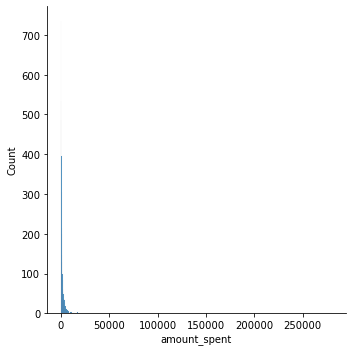

In [54]:
### Sub Problem 2: How to select customers whose aggregated amount_spent is in a given quantile range?

sns.displot(customers["amount_spent"])
VIP = customers[customers["amount_spent"] > np.percentile(customers, 95)].reset_index()
VIP = list(VIP["CustomerID"])
print(VIP, end=' ')

In [55]:
### Now for the preferred customers

preferred = customers[(customers["amount_spent"] < np.percentile(customers, 95)) & (customers["amount_spent"] > np.percentile(customers, 75))].reset_index()
preferred = list(preferred["CustomerID"])
print(preferred, end=' ')

[12347, 12348, 12349, 12352, 12356, 12360, 12362, 12370, 12371, 12378, 12380, 12381, 12383, 12388, 12395, 12397, 12405, 12406, 12407, 12408, 12417, 12423, 12424, 12429, 12432, 12437, 12438, 12444, 12449, 12454, 12455, 12456, 12457, 12473, 12480, 12481, 12483, 12484, 12490, 12500, 12501, 12502, 12517, 12518, 12520, 12523, 12524, 12528, 12530, 12539, 12553, 12560, 12562, 12569, 12578, 12584, 12585, 12594, 12597, 12598, 12600, 12610, 12613, 12615, 12619, 12625, 12627, 12633, 12635, 12643, 12645, 12647, 12653, 12656, 12662, 12664, 12668, 12669, 12670, 12674, 12684, 12685, 12688, 12700, 12704, 12708, 12712, 12714, 12720, 12721, 12726, 12727, 12747, 12749, 12752, 12754, 12755, 12758, 12762, 12764, 12779, 12782, 12783, 12823, 12836, 12839, 12840, 12841, 12843, 12853, 12856, 12867, 12876, 12906, 12909, 12910, 12912, 12913, 12916, 12928, 12935, 12948, 12949, 12950, 12955, 12957, 12963, 13004, 13012, 13013, 13014, 13015, 13021, 13047, 13048, 13050, 13069, 13082, 13094, 13115, 13124, 13126, 13134

In [93]:
### Sub Problem 3: How to label selected customers as "VIP" or "Preferred"?

def customer_category(row):
    if row["CustomerID"] in VIP:
        return "VIP"
    elif row["CustomerID"] in preferred:
        return "Preferred"
    else:
        return "No category"

In [96]:
orders["Customer Category"] = orders.apply(customer_category, axis=1)
print(orders["Customer Category"].value_counts())
orders

Preferred      151781
No category    141659
VIP            104484
Name: Customer Category, dtype: int64


,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent,Customer Category
0,0,536365,85123A,2010,12,3,8,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,Preferred
1,1,536365,71053,2010,12,3,8,white metal lantern,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,Preferred
2,2,536365,84406B,2010,12,3,8,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,Preferred
3,3,536365,84029G,2010,12,3,8,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,Preferred
4,4,536365,84029E,2010,12,3,8,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,Preferred
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397919,541904,581587,22613,2011,12,5,12,pack of 20 spaceboy napkins,12,2011-12-09 12:50:00,0.85,12680,France,10.20,No category
397920,541905,581587,22899,2011,12,5,12,children's apron dolly girl,6,2011-12-09 12:50:00,2.10,12680,France,12.60,No category
397921,541906,581587,23254,2011,12,5,12,childrens cutlery dolly girl,4,2011-12-09 12:50:00,4.15,12680,France,16.60,No category
397922,541907,581587,23255,2011,12,5,12,childrens cutlery circus parade,4,2011-12-09 12:50:00,4.15,12680,France,16.60,No category


Now we'll leave it to you to solve Q2 & Q3, which you can leverage from your solution for Q1:

## Q2: How to identify which country has the most VIP Customers?

In [85]:
### Here I am first making a dataframe that has unique customers with assigned country and category
### Then I am grouping by country and category, and counting the amount of categories per country

countries = orders[["Country", "Customer Category", "CustomerID"]].drop_duplicates()
countries = countries.groupby(["Country", "Customer Category"]).agg({'Customer Category':"count"})
countries.columns = ["Total_customers_per_cat"]
countries = countries.reset_index()
countries

,Country,Customer Category,Total_customers_per_cat
0,Australia,No category,5
1,Australia,Preferred,2
2,Australia,VIP,2
3,Austria,No category,8
4,Austria,Preferred,3
...,...,...,...
71,United Arab Emirates,No category,2
72,United Kingdom,No category,2989
73,United Kingdom,Preferred,755
74,United Kingdom,VIP,177


In [82]:
### Here I am finding out which country has the highest number of VIP customers

countries_VIP = countries[countries["Customer Category"] == "VIP"]
countries_VIP
country_most_VIP = countries_VIP[countries_VIP["Total_customers_per_cat"] == countries_VIP["Total_customers_per_cat"].max()]
country_most_VIP

,Country,Customer Category,Total_customers_per_cat
74,United Kingdom,VIP,177


## Q3: How to identify which country has the most VIP+Preferred Customers combined?

In [100]:
### Here I am creating a dataset with VIP and preferred customers combined 

countries_VIP_pref = countries[countries["Customer Category"].isin(["Preferred", "VIP"])]
countries_VIP_pref

,Country,Customer Category,Total_customers_per_cat
1,Australia,Preferred,2
2,Australia,VIP,2
4,Austria,Preferred,3
7,Belgium,Preferred,11
8,Belgium,VIP,1
11,Canada,Preferred,1
13,Channel Islands,Preferred,3
14,Channel Islands,VIP,1
16,Cyprus,Preferred,3
17,Cyprus,VIP,1


In [102]:
### Here I am finding out which country has the highest number of VIP + Preferred customers

countries_VIP_pref = countries_VIP_pref.groupby(["Country"]).agg({'Total_customers_per_cat':sum})
countries_VIP_pref
country_most_VIP_pref = countries_VIP_pref[countries_VIP_pref["Total_customers_per_cat"] == countries_VIP_pref["Total_customers_per_cat"].max()]
country_most_VIP_pref

,Total_customers_per_cat
Country,
United Kingdom,932
